<a href="https://colab.research.google.com/github/ABHAY1937/-ML/blob/main/heart_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
#importing file using pandas
df=pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:

df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#size of data se
df.shape

(1025, 14)

In [ ]:
#missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#total information
df.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [ ]:
#each details
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#x and y variable seperation
x=df.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [ ]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [ ]:
#testing and tarining data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=0)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
491,57,1,2,150,168,0,1,174,0,1.6,2,0,2
356,59,1,0,164,176,1,0,90,0,1.0,1,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2
105,47,1,0,110,275,0,0,118,1,1.0,1,1,2
68,37,0,2,120,215,0,1,170,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2


In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
807,44,1,2,130,233,0,1,179,1,0.4,2,0,2
27,58,0,1,136,319,1,0,152,0,0.0,2,2,2
77,63,1,0,140,187,0,0,144,1,4.0,2,2,3
406,58,1,2,140,211,1,0,165,0,0.0,2,0,2
886,61,1,0,120,260,0,1,140,1,3.6,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,51,1,2,94,227,0,1,154,1,0.0,2,1,3
984,59,1,0,135,234,0,1,161,0,0.5,1,0,3
717,56,1,2,130,256,1,0,142,1,0.6,1,1,1
167,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
#diamensions odf X,Y
x.ndim

2

In [ ]:
y.ndim

1

In [ ]:
#normalisation
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)
x_train

array([[ 0.27717522,  0.65226323,  1.02564169, ...,  0.9790949 ,
        -0.73793656, -0.51108759],
       [ 0.49897726,  0.65226323, -0.91725155, ..., -0.66111782,
         1.20371671, -2.12540389],
       [ 1.82978951, -1.53312338, -0.91725155, ..., -0.66111782,
        -0.73793656, -0.51108759],
       ...,
       [ 1.16438338,  0.65226323,  1.99708831, ..., -0.66111782,
         0.23289007, -0.51108759],
       [ 1.38618543,  0.65226323, -0.91725155, ..., -0.66111782,
        -0.73793656, -0.51108759],
       [ 0.60987828,  0.65226323,  1.02564169, ..., -0.66111782,
        -0.73793656, -0.51108759]])

In [ ]:
x_test

array([[-1.11935087,  0.68313005,  1.0322342 , ...,  1.03563873,
        -0.7181895 , -0.54798356],
       [ 0.40517249, -1.46385011,  0.05997691, ...,  1.03563873,
         1.22218213, -0.54798356],
       [ 0.94964512,  0.68313005, -0.91228038, ...,  1.03563873,
         1.22218213,  1.05943489],
       ...,
       [ 0.18738344,  0.68313005,  1.0322342 , ..., -0.54345399,
         0.25199632, -2.15540202],
       [ 0.29627796, -1.46385011, -0.91228038, ...,  1.03563873,
        -0.7181895 , -0.54798356],
       [-0.03040561,  0.68313005, -0.91228038, ..., -0.54345399,
         0.25199632,  1.05943489]])

In [ ]:
#implimenting KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,

In [ ]:
y_test

807    1
27     0
77     0
406    1
886    0
      ..
808    1
984    1
717    0
167    1
878    0
Name: target, Length: 308, dtype: int64

In [ ]:
#predicting the patient have disorder or not
pred=model.predict([[58,1,0,146,218,0,1,105,0,2.0,1,1,3]])
pred

array([1])

In [ ]:
#implimenting confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
result = confusion_matrix(y_test,y_pred)
result

array([[125,  20],
       [ 21, 142]])

In [ ]:
report=classification_report(y_test,y_pred)
report

'              precision    recall  f1-score   support\n\n           0       0.86      0.86      0.86       145\n           1       0.88      0.87      0.87       163\n\n    accuracy                           0.87       308\n   macro avg       0.87      0.87      0.87       308\nweighted avg       0.87      0.87      0.87       308\n'

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       145
           1       0.88      0.87      0.87       163

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308


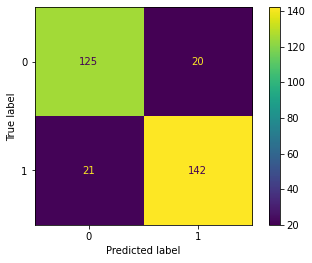

In [ ]:
#how to display generate confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
result = confusion_matrix(y_test,y_pred)
labels=[0,1]
cmd=ConfusionMatrixDisplay(result,display_labels=labels)
cmd.plot()

In [ ]:
#accuracy prediction
score=accuracy_score(y_test,y_pred)
score

0.8668831168831169